<a href="https://colab.research.google.com/github/zdwhite/Thinkful-Unit-2/blob/master/Challenge_make_your_own_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv"
            )
df = pd.read_csv(data_path, delimiter= ',')

#drop the first 4 rows of data as they aren't needed
df = df.drop([0,1,2,3])

#remove the last 3 rows as they aren't needed either
df = df.iloc[:len(df)-3]


# there aren't many columns just clean them by hand
df.columns = ['City',	'Population',	'Violent',	'Murder', 	'Rape_revised',	'Rape_legacy',	'Robbery',	'Aggravated_assault',	'Property_crime',	'Burglary',	'Larceny_theft',	'Motor_vehicle_theft',	'Arson']

# lots of NaN values lets just fill them in with 0s
df.fillna(0,inplace=True)

# drop all the columns not used for the regression model
df=df.loc[:,['City','Population','Murder','Robbery','Property_crime']]
df.set_index('City',inplace=True)

#remove ','
df = df.apply(lambda x: x.str.replace(',',''))

#turn columns into integars
df = df.apply(lambda x: pd.to_numeric(x,errors='coerce'))


In [34]:
df.head(5)

,Population,Murder,Robbery,Property_crime
City,,,,
Adams Village,1861,0,0,12
Addison Town and Village,2577,0,0,24
Akron Village,2846,0,0,16
Albany,97956,8,227,4090
Albion Village,6388,0,4,223


>Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property Crime = \alpha + Population + Population^2 + Murder + Robbery$$


1.     Murder (continuous) > Murder(categorical)

2.    Robbery (continuous) > Robbery(categorical)

In [0]:
#define a quick function to apply over murder and robbery columns
# Turns elements into binary categorical data from continuous

def non_zero(x):
  if int(x) > 0:
    return 1
  return 0


#Holy shit this is elegant !!
# takes murder and robbery columns looks at each element and applys the non_zero function above
#df.loc[:,'Murder':'Robbery'] = df.loc[:,'Murder':'Robbery'].apply(lambda x: x.apply(non_zero))

# Turn Population into integar values (These lines are depretiated and are not needed)
#  I like the code as examples of using .loc in combination with apply and lambda
#df.loc[:,'Population'] = df.loc[:,'Population'].apply(lambda x: int(x))
#df.loc[:,'Population'] = int(df.loc[:,'Population'])


#Create Population Squared
df['Population_squared'] = df.loc[:,'Population'].apply(lambda x: int(x)**2)

In [36]:
correlation_matrix = df.corr()
display(correlation_matrix)

,Population,Murder,Robbery,Property_crime,Population_squared
Population,1.000000,0.986758,0.998469,0.996265,0.998264
Murder,0.986758,1.000000,0.993104,0.995403,0.979574
Robbery,0.998469,0.993104,1.000000,0.998237,0.995876
Property_crime,0.996265,0.995403,0.998237,1.000000,0.991027
Population_squared,0.998264,0.979574,0.995876,0.991027,1.000000


In [37]:

from sklearn import linear_model

regr = linear_model.LinearRegression()
Y = df['Property_crime'].values.reshape(-1, 1)
X = df.loc[:,df.columns !='Property_crime']
regr.fit(X, Y)

# Inspect the results.
print('\nIndependant Variables:','\n   Population      ','Murder         ','Robbery        ', 'Population_squared')
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Independant Variables: 
   Population       Murder          Robbery         Population_squared

Coefficients: 
 [[ 1.59237145e-02  1.17559916e+02  2.09186426e+00 -1.01046282e-09]]

Intercept: 
 [24.1315523]

R-squared:
0.9987417419604476


In [38]:
""#df.loc[:,df.columns !='Property_crime']

df.columns 

Index(['Population', 'Murder', 'Robbery', 'Property_crime',
       'Population_squared'],
      dtype='object')

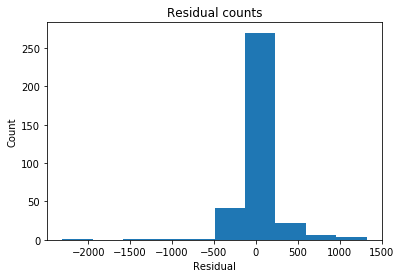

In [39]:
predicted = regr.predict(X).ravel()
actual = df['Property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()



HMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM

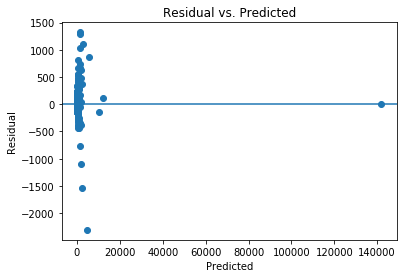

In [40]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Nothing wrong with this picture ... Other than everything. 

Look dad I'm predicting stuff with my model. It can even draw 

![Draw](https://i.ytimg.com/vi/pj-eTk1ZlD8/hqdefault.jpg)

In [0]:
df